<a href="https://colab.research.google.com/github/OseiasBeu/Data-Science/blob/master/AnalisandoONaufragioTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://cdn-istoedinheiro-ssl.akamaized.net/wp-content/uploads/sites/17/2019/01/titanic.jpg)

O ***RMS Titanic*** foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic. Projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews, sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".

A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte com mais de 1 500 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história. Seu naufrágio destacou vários pontos fracos de seu projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas da época. Comissões de inquérito foram instauradas nos Estados Unidos e no Reino Unido, levando a mudanças nas leis internacionais de navegação que permanecem em vigor mais de um século depois.

Os destroços do Titanic foram procurados por décadas até serem encontrados em 1985 por uma equipe liderada por Robert Ballard. Ele se encontra a 3843m de profundidade e a 650km ao sudeste de Terra Nova no Canadá. Sua história e naufrágio permaneceram no imaginário popular durante décadas, levando a produção de vários livros e filmes a seu respeito, mais notavelmente o filme Titanic de 1997. Até hoje o Titanic permanece como um dos navios mais famosos da história, com seus destroços atraindo várias expedições de exploração ao longo dos anos.

Esse pequeno projeto tem por finalidade analisar a base de dados de tripulantes do RMS Titanic.

Fazendo a importação da base e dando uma olhada no cabeçalho:

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
wb = pd.read_csv('https://raw.githubusercontent.com/OseiasBeu/Data-Science/master/DataSets/titanic.csv')
df = pd.DataFrame(wb)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Abaixo estão as descrições das colunas do nosso Dataset:
 - passengerid = ID do passageiro do navio (código primário).
 - survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu.
 - pclass = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe.
 - name = Nome do passageiro
 - sex = Gênero do passageiro, sendo masculino e feminino.
 - age = Idade do passageiro na data da ocorrência do naufrágio.
 - sibsp = Número de irmãos / cônjuges a bordo.
 - parch = Número de pais / filhos a bordo.
 - ticket = Código do ticket.
 - fare = Valor da passagem.
 - cabin = Código de identificação da Cabine.
 - embarked = Local ondem o passageiro embarcou no navio.


Agora que temos a definição de cada campo, vamos entender com quais tipos de dados estamos lidando:


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Desse modo podemos identificar com quais tipos de dados estamos trabalhando e além disso, verificar se existem dados nulos dentro do nosso dataset. Com essa visão já podemos dizer que temos sim. Agora, vamos fazer uma contagem e identificar exatamente quais são esses caras.

In [38]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Desse modo, podemos ver que a coluna Age possue 177 registros nulos, a coluna Cabin possuem 687 registros nulos e a coluna Embarked possui 2 registros nulos.
Abaixo, vamos eliminar esses registros que são nulos para que isso não interfira em nossas conclusões.

In [70]:
df['Age'].fillna(0, inplace= True)
df['Cabin'].fillna(0, inplace= True)
df['Embarked'].fillna(0, inplace= True)
print('Quantidade de registros em nosso datase: {0} \nLinhas: {1} \nColunas: {2}\n'.format(df.shape,df.shape[0],df.shape[1]))
print('Estatísca geral para analise exploratória: \n{0}\n'.format(df.describe()))
print('Quantdade de dados nulos em nosso dataset: \n{0} \n'.format(df.isnull().sum()))

Quantidade de registros em nosso datase: (891, 13) 
Linhas: 891 
Colunas: 13

Estatísca geral para analise exploratória: 
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

Quantdade de dados nulos em nosso dataset: 
PassengerId    0
Survived       0
Pclass         0
Name

Agora, para facilidar nas legendas de gráficos, vamos criar uma coluna para identificarmos de o passageiro sobreviveu ou se não sobreviveu.

In [59]:
df['Sobreviveu?'] = df['Survived'].replace([0,1],['Não','Sim'])

Vamos identificar a quantidade de sobreviventes em nosso dataset: 

In [71]:
df['Sobreviveu?'].value_counts()

Não    549
Sim    342
Name: Sobreviveu?, dtype: int64

Identificando a quantidade de pessoas por classe:

In [75]:
df['Pclass'].groupby([df['Pclass']]).count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

Podemos colocar isso em um gráfico de pizza para identificar a quantidade de passageiros por classe e maneira vizual: 

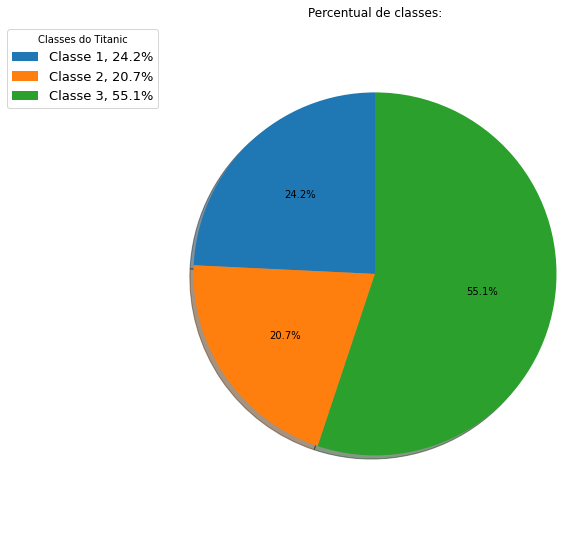

In [79]:
agrupamento_por_classes = df['Pclass'].groupby([df['Pclass']]).count() 
labels = ['Classe 1', 'Classe 2', 'Classe 3']
fig1, ax1 = plt.subplots(figsize=(8,7))
fig1.subplots_adjust(0.3,0,1,1)
ax1.pie(agrupamento_por_classes, autopct='%0.1f%%',frame=False,shadow=True, startangle=90) #radius=180000,autopct='%0.01f%%'

total = sum(agrupamento_por_classes)
ax1.legend(  
           title='Classes do Titanic',
           loc = 'upper left',
           labels=['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, agrupamento_por_classes)],
           bbox_to_anchor=(0.0, 1),
           prop={'size': 13},
           bbox_transform=fig1.transFigure)
ax1.axis('equal')
plt.xticks(fontsize=1)
ax1.set_title('Percentual de classes:')
plt.show()

Note que, mais de 55% dos passageiros estavam localizados na terceia classe do navio.

In [45]:
df['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

Vamos analisar algumas médias e frequências de Idade, Classe é portão de Embarque.

In [82]:
print("A idade média dos tripulantes é de:{0}".format(df['Age'].mean()))
print("A classe média dos tripulantes é de:{0}".format((df['Pclass']).mean()))
print("Portão mais utilizado para embarque:{0}".format(df['Embarked'].mode()))

A idade média dos tripulantes é de:23.79929292929293
A classe média dos tripulantes é de:2.308641975308642
Portão mais utilizado para embarque:0    S
dtype: object


##Quantidade de pessoas que sobreviveram e morreram ao naufrágio:

Vamos identificar a quantidade de pessoas que sobreviveram ao naufrágio segregando por sexo:


Pclass  Sobreviveu?
1       Sim            136
        Não             80
2       Não             97
        Sim             87
3       Não            372
        Sim            119
Name: Sobreviveu?, dtype: int64


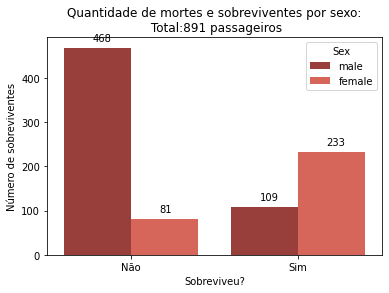

In [86]:
passagers = sns.countplot(data = df, x ='Sobreviveu?', hue ='Sex',palette='Reds_d')
for p in passagers.patches:
  b =p.get_bbox()
  passagers.annotate("{:.0f}".format(b.y1+b.y0),((b.x0 + b.x1)/2 -0.03,b.y1+15))

plt.title('Quantidade de mortes e sobreviventes por sexo:\n Total:%s passageiros' %(df.shape[0]))
plt.xlabel('Sobreviveu?')
plt.ylabel('Número de sobreviventes')
plt.show()

Pclass  Sobreviveu?
1       Sim            136
        Não             80
2       Não             97
        Sim             87
3       Não            372
        Sim            119
Name: Sobreviveu?, dtype: int64


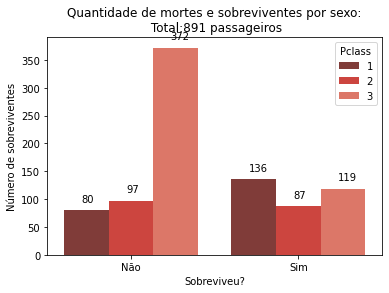

In [87]:
print(df.groupby('Pclass')['Sobreviveu?'].value_counts())
passagers = sns.countplot(data = df, x ='Sobreviveu?', hue ='Pclass',palette='Reds_d')
for p in passagers.patches:
  b =p.get_bbox()
  passagers.annotate("{:.0f}".format(b.y1+b.y0),((b.x0 + b.x1)/2 -0.03,b.y1+15))

plt.title('Quantidade de mortes e sobreviventes por sexo:\n Total:%s passageiros' %(df.shape[0]))
plt.xlabel('Sobreviveu?')
plt.ylabel('Número de sobreviventes')
plt.show()

Como podemos ver acima, mais mulheres do que homens sobreviveram ao naufrágio e além disso temos a maior concentração de sobreviventes na primeira classe enquanto que a maior concentração de mortes na terceira classe. Podemos especular que o fato do sexo feminino estar maior em nossa taxa de sobreviventes pelo fato de mulheres e crianças serem priorizadas na evacuação de acidentes. E sabemos que temos a maior taxa de sobreviventes concentrada na primeira classe porque foi a classe que afundou por último, então os tripulantes podiam sair com mais facilidade. 

![alt text](https://photos1.blogger.com/blogger/309/1494/1600/velho_novo.jpg)


Com a visualização abaixo, é possível ver a proporção de sobreviventes de sexo masculino e feminino com mais facilidade.

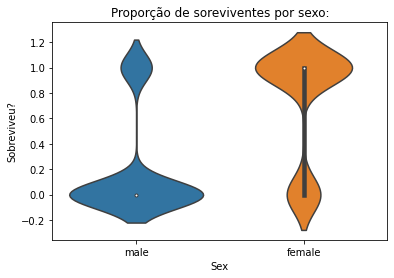

In [49]:
sobreviventes_sexo = df.copy()
sobreviventes_sexo['Sobreviveu?'] = df['Sobreviveu?'] == 'Sim'
sns.violinplot(data=sobreviventes_sexo, y='Sobreviveu?', x='Sex',size=15)
plt.title('Proporção de soreviventes por sexo:')
plt.show()

Proporção de sobreviventes por classe:

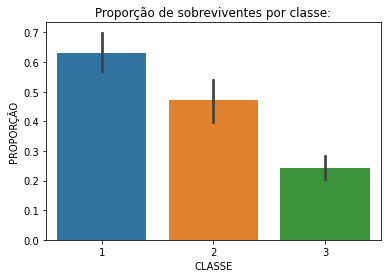

In [50]:
sobreviventes_classe = df.copy()
sobreviventes_classe['Sobreviveu?'] = df['Sobreviveu?'] == 'Sim'

sns.barplot(data=sobreviventes_classe, y='Sobreviveu?', x='Pclass')
plt.title('Proporção de sobreviventes por classe:')
plt.ylabel('PROPORÇÃO')
plt.xlabel('CLASSE')
plt.show()

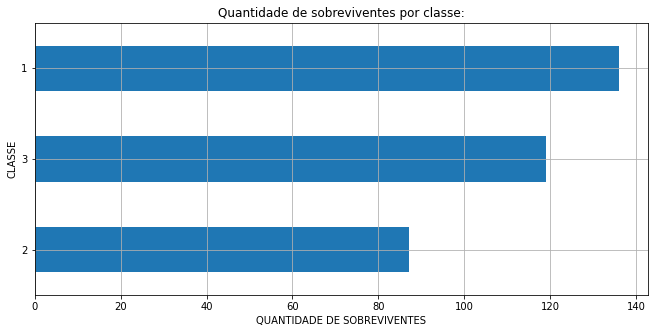

In [51]:
sobreviventes_por_classe = df[df['Sobreviveu?'] == 'Sim']['Pclass'].value_counts().sort_values(ascending=True)

sobreviventes_por_classe.plot(kind='barh',figsize=(11,5),rot=0,grid=True)

plt.title('Quantidade de sobreviventes por classe:')
plt.xlabel('QUANTIDADE DE SOBREVIVENTES')
plt.ylabel('CLASSE')
plt.show()  

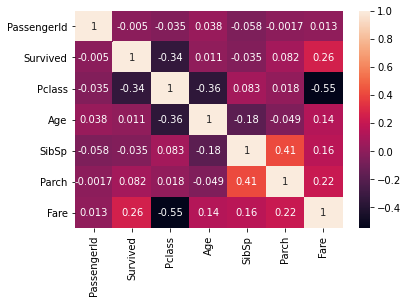

In [52]:
# corrMatrix = df[df['Sobreviveu?'] == 'Sim'].corr()
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

####CONCLUSÃO:

Nossa análise exploratória teve como objetivo identificar atributos de alguns conjunto de pessoas para saber se tiveram maior chance de sobrevivência que outras.
Sabe-se que o navio possuía um número de botes muito inferior ao número necessário para salvar a quantidade de pessoas abordo. Mesmo assim, era um número acima do exigido pelas legislações marítimas na época. Sendo assim, houve alguma priorização para a utilização dos botes?
Identificamos que fatores como a Classe, Sexo e Idade realmente influenciaram para o aumento ou diminuição das chances de sobrevivência.
As mulheres foram as que tiveram maiores chances de sobrevivência. Principalmente as da primeira e segunda classe. Os gráficos 3.5, 3.6 e 3.7 mostram uma visão bem clara da diferença. Em resumo as maiores chances de sobrevivência foram para as mulheres da primeira e segunda classe. E as menores chances de sobrevivência foram para os homens da terceira classe.
Realizando pesquisas foi encontrado um relato que o segundo oficial Lightoller se dirigiu ao capitão e sugeriu que a evacuação fosse iniciada com as mulheres e crianças. O capitão Smith concordou. Isso com certeza fez com que os índices de sobrevivência aumentassem e bastante, tanto para mulheres quanto para crianças.

Obs.: A preferência do embarque para mulheres e crianças ocorrida no Titanic é considerada uma exceção, ou seja, geralmente isso não ocorre em outros naufrágios. Muitos homens, em sua maioria da primeira classe, se recusaram a entrar nos botes. Tiveram que ser persuadidos.
Em relação às crianças (menores que 12 anos — utilizado como referência o estatuto da criança e do adolescente), pudemos identificar que tiveram uma média de sobrevivência acima dos demais (0,57 contra 0,38) — Gráficos 4.2.1, 4.2.2, 4.3 e 4.4.

Foi identificado também que a maioria das pessoas que não sobrevieram foram da terceira classe (Gráficos G2.4, 2.5, 2.6 , 3.6 e 3.7). Conforme podemos constatar no gráfico 4.5 e 4.6 das crianças da terceira classe 60% morreram, enquanto que na primeira classe foi de 15% e para a segunda classe nenhuma criança morreu. Podemos ver essa mesma tendência de maior taxa de sobrevivência das mulheres entre primeira / segunda classe e a terceira classe através do gráfico 3.7.

Em pesquisas realizadas também foi informado que muito poucas pessoas da terceira classe tinham conseguido chegar ao convés superior, com a maioria se perdendo nos labirintos de corredores ou ficando presos atrás de grades que segregavam as acomodações da terceira classe daquelas da primeira e segunda. Aparentemente em pelo menos em alguns lugares, a tripulação do Titanic ativamente impediu que os passageiros da terceira classe escapassem, com barreiras trancadas e vigiadas por tripulantes a fim de impedir que as pessoas corressem para os botes.

Este estudo pode ser continuado com a análise de outras variáveis, explorar e encontrar novos insights utilizando as informações desta base para gerar novas variáveis, como por exemplo saber se é possível identificar os tripulantes. Será que quem não tem informação de Tarifa (Fare) preenchida pode ser um tripulante? Seria possível identificá-los e encontrar sua taxa de sobrevivência e compará-la e ver se essa taxa foi maior que a taxa de sobrevivência dos passageiros? A própria idade como já comentado poderia ser explorada através de técnicas preditivas para identificarmos melhor como esta informação impactou na taxa de sobrevivência.

Observações:

É importante ressaltar que as conclusões identificadas não são definitivas, pois não estamos usando técnicas estatísticas para a realização deste estudo.
Os gráficos foram criados com o objetivo de explorar e conhecer os dados. Em um segundo momento, caso queiramos apresentar os achados em forma de uma mensagem clara e eficaz, 